<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/feature_select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공모주 시초가 예측 baseline(내가 개인적으로 추가한 6가지 변수를 제외해야 완전한 베이스 라인이 될 것이다.

In [ ]:
# !unzip /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.zip -d /content/drive/MyDrive/인공지능/경영빅데이터/data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import pointbiserialr

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPOv2_resampled_data.csv')

## 데이터 기본 정보 파악

In [ ]:
df.head()

,신규상장일,최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,청약경쟁률,...,매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(비율),ROE,종속변수
0,20220520,6,14,0.43,11000,13000,14000,1.08,1847.12,2183.29,...,17098,1852,5744,0.75,0.00,0.25,11500000,0.2865,32.242340,0
1,20151221,1,26,0.04,8000,10000,6000,0.60,11.35,40.92,...,208,-3714,6908,0.77,0.03,0.20,13800000,0.6255,-53.763752,0
2,20201118,2,20,0.10,18000,23000,15000,0.65,64.33,566.54,...,577,-44067,7742,0.80,0.00,0.20,15400000,0.2759,-569.194007,1
3,20220323,6,18,0.33,26000,31000,20000,0.65,56.90,7.53,...,32683,4346,367,0.74,0.01,0.25,3963211,0.3554,1184.196185,0
4,20161025,1,14,0.07,4000,6000,5000,0.83,140.75,7.01,...,28652,0,13375,0.80,0.00,0.20,67500000,0.2500,0.000000,0


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   신규상장일                            832 non-null    int64  
 1   최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  832 non-null    int64  
 2   최근 3개월 공모주 수                     832 non-null    int64  
 3   최근 "따" 비율                        832 non-null    float64
 4   희망공모가_하한                         832 non-null    int64  
 5   희망공모가_상한                         832 non-null    int64  
 6   공모가                              832 non-null    int64  
 7   밴드수익률(공모가/공모가_상한)                832 non-null    float64
 8   기관경쟁률                            832 non-null    float64
 9   청약경쟁률                            832 non-null    float64
 10  의무보유확약                           832 non-null    float64
 11  대표주간사                            832 non-null    int64  
 12  IPO 주간사 순위            

In [ ]:
print(df.describe())

              신규상장일  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  최근 3개월 공모주 수  \
count  8.320000e+02                       832.000000    832.000000   
mean   2.019295e+07                         3.962740     16.681490   
std    2.252614e+04                         3.509287      5.955571   
min    2.015053e+07                         0.000000      1.000000   
25%    2.017575e+07                         1.000000     13.000000   
50%    2.019684e+07                         3.000000     17.000000   
75%    2.021064e+07                         6.000000     21.000000   
max    2.023052e+07                        17.000000     34.000000   

        최근 "따" 비율       희망공모가_하한       희망공모가_상한            공모가  \
count  832.000000     832.000000     832.000000     832.000000   
mean     0.241071   14767.719952   17685.096154   16805.823317   
std      0.175281   14568.477653   16953.105639   14081.066897   
min      0.000000    1450.000000    1550.000000    1300.000000   
25%      0.110000    7974.750000    970

In [ ]:
print(df.isnull().sum())


신규상장일                              0
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)    0
최근 3개월 공모주 수                       0
최근 "따" 비율                          0
희망공모가_하한                           0
희망공모가_상한                           0
공모가                                0
밴드수익률(공모가/공모가_상한)                  0
기관경쟁률                              0
청약경쟁률                              0
의무보유확약                             0
대표주간사                              0
IPO 주간사 순위                         0
총 공모주식 수                           0
구주매출(비율)                           0
매출액(백만원)                           0
순이익(백만원)                           0
자본금(백만원)                           0
전문투자자(비율)                          0
우리사주조합(비율)                         0
일반청약자(비율)                          0
공모후 상장주식수(주식수)                     0
유통가능주식합계(비율)                       0
ROE                                0
종속변수                               0
dtype: int64


## feature select

### 1) 상관관계 분석(t-검정이었나)

In [ ]:
import pandas as pd

# 데이터프레임 df를 가정합니다. 이 데이터프레임은 위에서 언급한 모든 변수를 포함합니다.
correlation_matrix = df.corr()

print(correlation_matrix)


                                    신규상장일  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  \
신규상장일                            1.000000                         0.443024   
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  0.443024                         1.000000   
최근 3개월 공모주 수                     0.108491                         0.385031   
최근 "따" 비율                        0.459764                         0.879574   
희망공모가_하한                         0.005031                        -0.051764   
희망공모가_상한                         0.012696                        -0.043679   
공모가                              0.002948                        -0.008264   
밴드수익률(공모가/공모가_상한)                0.049962                         0.218546   
기관경쟁률                            0.559941                         0.458658   
청약경쟁률                           -0.028735                         0.015142   
의무보유확약                          -0.100447                         0.076570   
대표주간사                           -0.094302                       

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


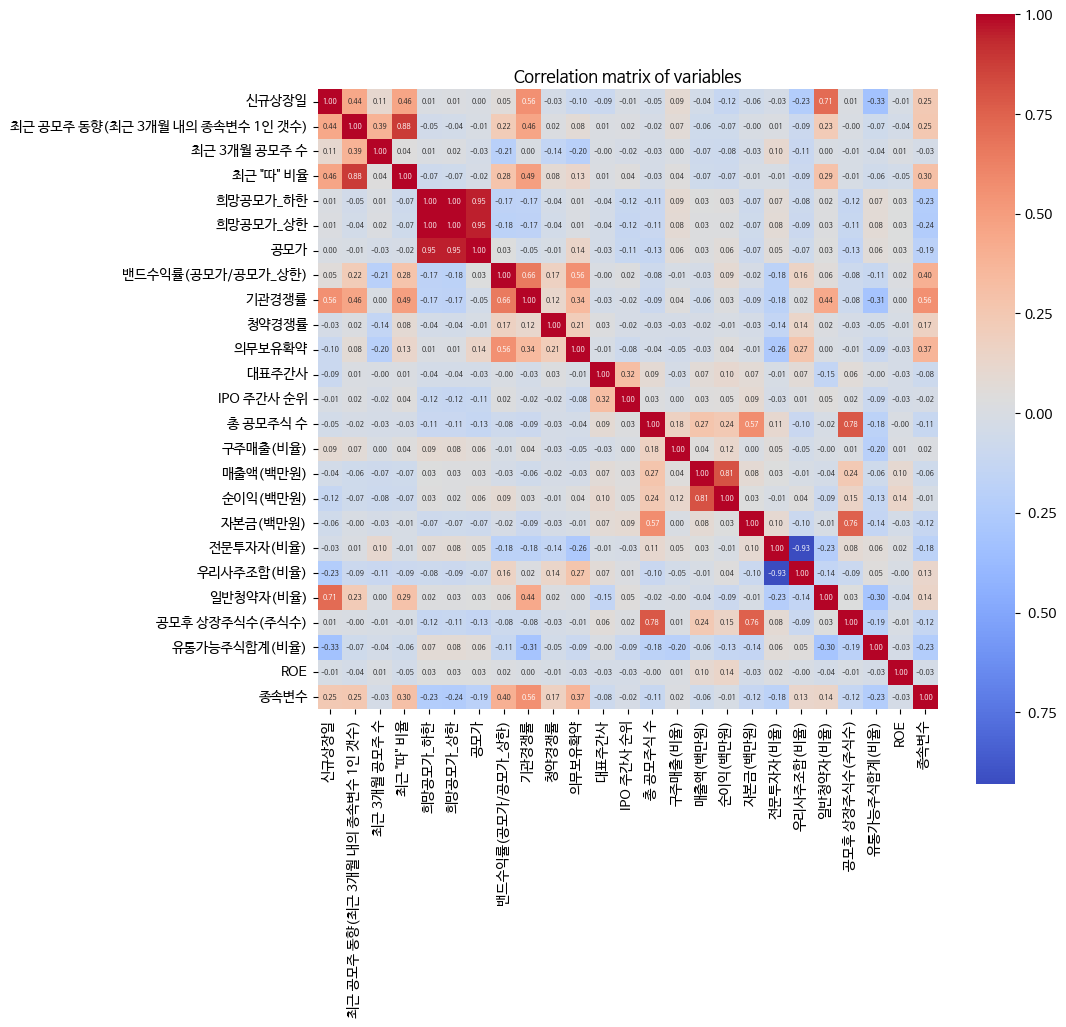

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap = 'coolwarm' , annot_kws={"size": 5})
plt.title('Correlation matrix of variables')
plt.show()


In [ ]:
from scipy.stats import pointbiserialr

X = df.drop('종속변수',  axis=1)
y = df['종속변수']
# y는 이진변수, X는 연속 변수를 나타내는 DataFrame을 가정합니다.
# 각 피처와 목표 변수 사이의 point-biserial correlation 계산
for column in X.columns:
    pbc = pointbiserialr(X[column], y)
    print(f"The correlation between {column} and 종속변수 is {pbc.correlation}")


The correlation between 신규상장일 and 종속변수 is 0.24555176625455344
The correlation between 최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수) and 종속변수 is 0.25325810841257634
The correlation between 최근 3개월 공모주 수 and 종속변수 is -0.02928076481202068
The correlation between 최근 "따" 비율 and 종속변수 is 0.3038921362543132
The correlation between 희망공모가_하한 and 종속변수 is -0.2307990131345728
The correlation between 희망공모가_상한 and 종속변수 is -0.2372446255057855
The correlation between 공모가 and 종속변수 is -0.19056182276644973
The correlation between 밴드수익률(공모가/공모가_상한) and 종속변수 is 0.4020949230141224
The correlation between 기관경쟁률 and 종속변수 is 0.5556797961715914
The correlation between 청약경쟁률 and 종속변수 is 0.1714825416442523
The correlation between 의무보유확약 and 종속변수 is 0.3670122597145205
The correlation between 대표주간사 and 종속변수 is -0.08499524456784419
The correlation between IPO 주간사 순위 and 종속변수 is -0.02236234001451555
The correlation between 총 공모주식 수 and 종속변수 is -0.11150361862621816
The correlation between 구주매출(비율) and 종속변수 is 0.015237754298508058
The 

### 2) 로지스틱회귀분석

In [ ]:
import statsmodels.api as sm

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('종속변수', axis=1)
y = df['종속변수']

# 로지스틱 회귀 모델 생성
logit_model = sm.Logit(y, sm.add_constant(X))

# 모델 훈련
result = logit_model.fit()

# 결과 출력
result.summary2()


Optimization terminated successfully.
         Current function value: 0.364019
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                  Pseudo R-squared:       0.475      
Dependent Variable:         종속변수                   AIC:                    655.7270   
Date:                       2023-06-04 09:01       BIC:                    773.8228   
No. Observations:           832                    Log-Likelihood:         -302.86    
Df Model:                   24                     LL-Null:                -576.70    
Df Residuals:               807                    LLR p-value:            2.0135e-100
Converged:                  1.0000                 Scale:                  1.0000     
No. Iterations:             11.0000                                                   
--------------------------------------------------------------------------------------
                                  Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
--------------------------------------------------------------------------------------
const                           -622.4325 205.1542 -3.0340 0.0024 -1024.5274 -220.3376
신규상장일                              0.0000   0.0000  3.3350 0.0009     0.0000    0.0001
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)   -0.2246   0.0967 -2.3212 0.0203    -0.4142   -0.0349
최근 3개월 공모주 수                       0.0488   0.0265  1.8444 0.0651    -0.0031    0.1007
최근 "따" 비율                          4.2993   1.7165  2.5047 0.0123     0.9350    7.6636
희망공모가_하한                          -0.0000   0.0002 -0.0943 0.9249    -0.0003    0.0003
희망공모가_상한                           0.0000   0.0001  0.1144 0.9089    -0.0002    0.0003
공모가                               -0.0001   0.0001 -1.4138 0.1574    -0.0002    0.0000
밴드수익률(공모가/공모가_상한)                 -1.5113   1.7353 -0.8709 0.3838    -4.9125    1.8899
기관경쟁률                              0.0004   0.0005  0.7722 0.4400    -0.0006    0.0013
청약경쟁률                              0.0021   0.0003  6.6236 0.0000     0.0015    0.0027
의무보유확약                             7.3770   0.9968  7.4009 0.0000     5.4234    9.3307
대표주간사                             -0.0637   0.0224 -2.8457 0.0044    -0.1076   -0.0198
IPO 주간사 순위                         0.0352   0.0218  1.6154 0.1062    -0.0075    0.0780
총 공모주식 수                          -0.0000   0.0000 -0.3492 0.7269    -0.0000    0.0000
구주매출(비율)                          -0.3757   0.8151 -0.4610 0.6448    -1.9734    1.2219
매출액(백만원)                          -0.0000   0.0000 -0.5793 0.5624    -0.0000    0.0000
순이익(백만원)                          -0.0000   0.0000 -0.3062 0.7595    -0.0000    0.0000
자본금(백만원)                           0.0000   0.0000  0.4856 0.6273    -0.0000    0.0000
전문투자자(비율)                        -37.1987  55.4634 -0.6707 0.5024  -145.9049   71.5076
우리사주조합(비율)                       -33.9835  55.4370 -0.6130 0.5399  -142.6381   74.6710
일반청약자(비율)                        -62.7647  56.4040 -1.1128 0.2658  -173.3145   47.7852
공모후 상장주식수(주식수)                    -0.0000   0.0000 -2.3859 0.0170    -0.0000   -0.0000
유통가능주식합계(비율)                      -3.8217   1.0312 -3.7060 0.0002    -5.8429   -1.8005
ROE                               -0.0000   0.0001 -0.0272 0.9783    -0.0002    0.0002
======================================================================================

"""

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


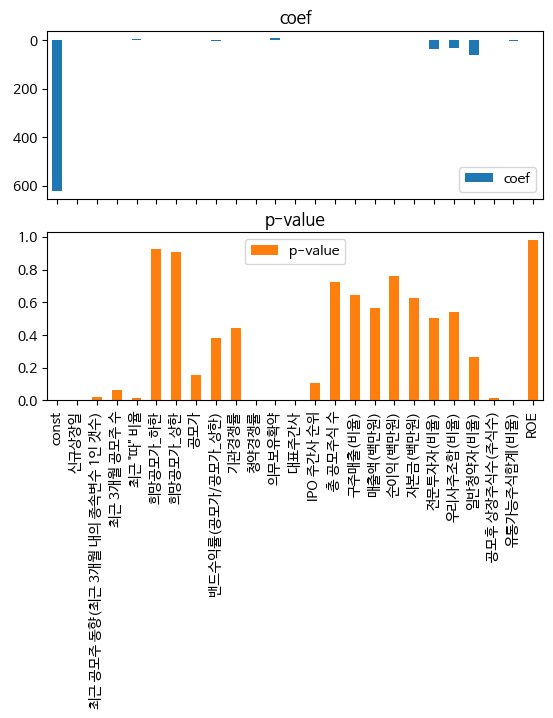

In [ ]:
import matplotlib.pyplot as plt

# p-values와 회귀 계수를 DataFrame으로 변환
coef = pd.DataFrame({'coef': result.params, 'p-value': result.pvalues})

# bar plot 그리기
coef.plot(kind='bar', subplots=True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Logistic Regression Score: ", logreg.score(X_test, y_test))

logreg_pred = logreg.predict(X_test)
print("Logistic Regression: ")
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Score:  0.6706586826347305
Logistic Regression: 
[[45 32]
 [23 67]]
              precision    recall  f1-score   support

           0       0.66      0.58      0.62        77
           1       0.68      0.74      0.71        90

    accuracy                           0.67       167
   macro avg       0.67      0.66      0.66       167
weighted avg       0.67      0.67      0.67       167



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3) 결정나무 CART


Accuracy:  0.8023952095808383
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        77
           1       0.81      0.82      0.82        90

    accuracy                           0.80       167
   macro avg       0.80      0.80      0.80       167
weighted avg       0.80      0.80      0.80       167



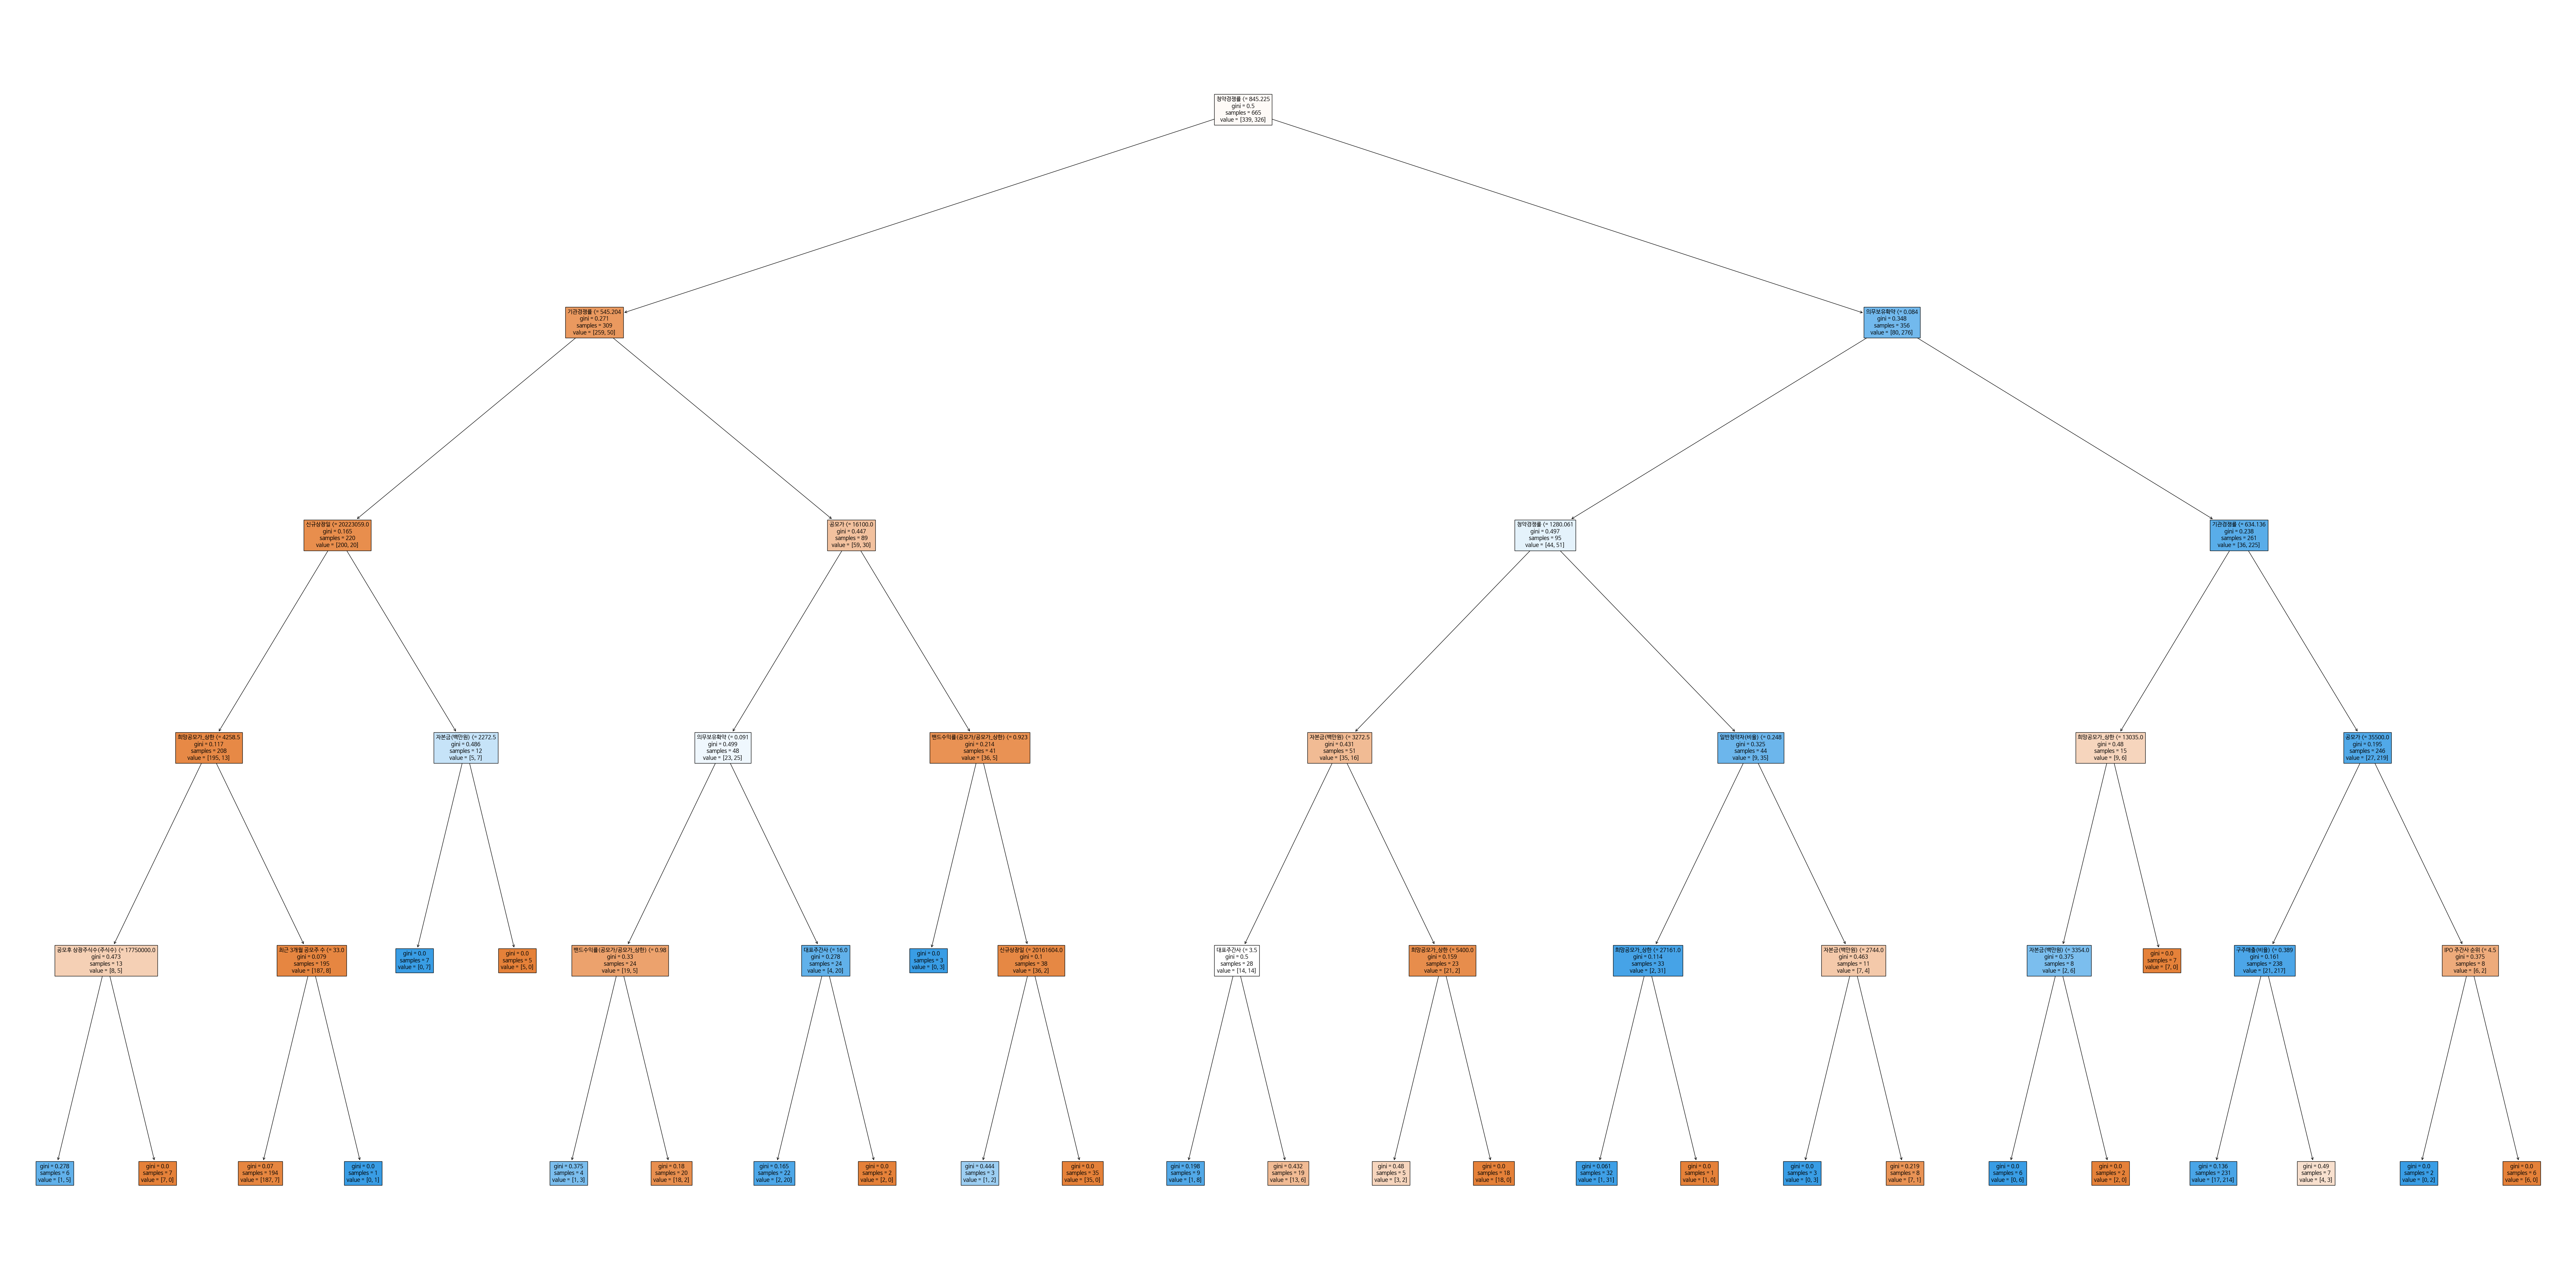

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split data into training and test sets


# Define the classifier
dtc = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Measure the performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(100,50))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()


### 4) 결정나무 C 5.0

Accuracy:  0.7904191616766467
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.78      0.77        77
           1       0.81      0.80      0.80        90

    accuracy                           0.79       167
   macro avg       0.79      0.79      0.79       167
weighted avg       0.79      0.79      0.79       167



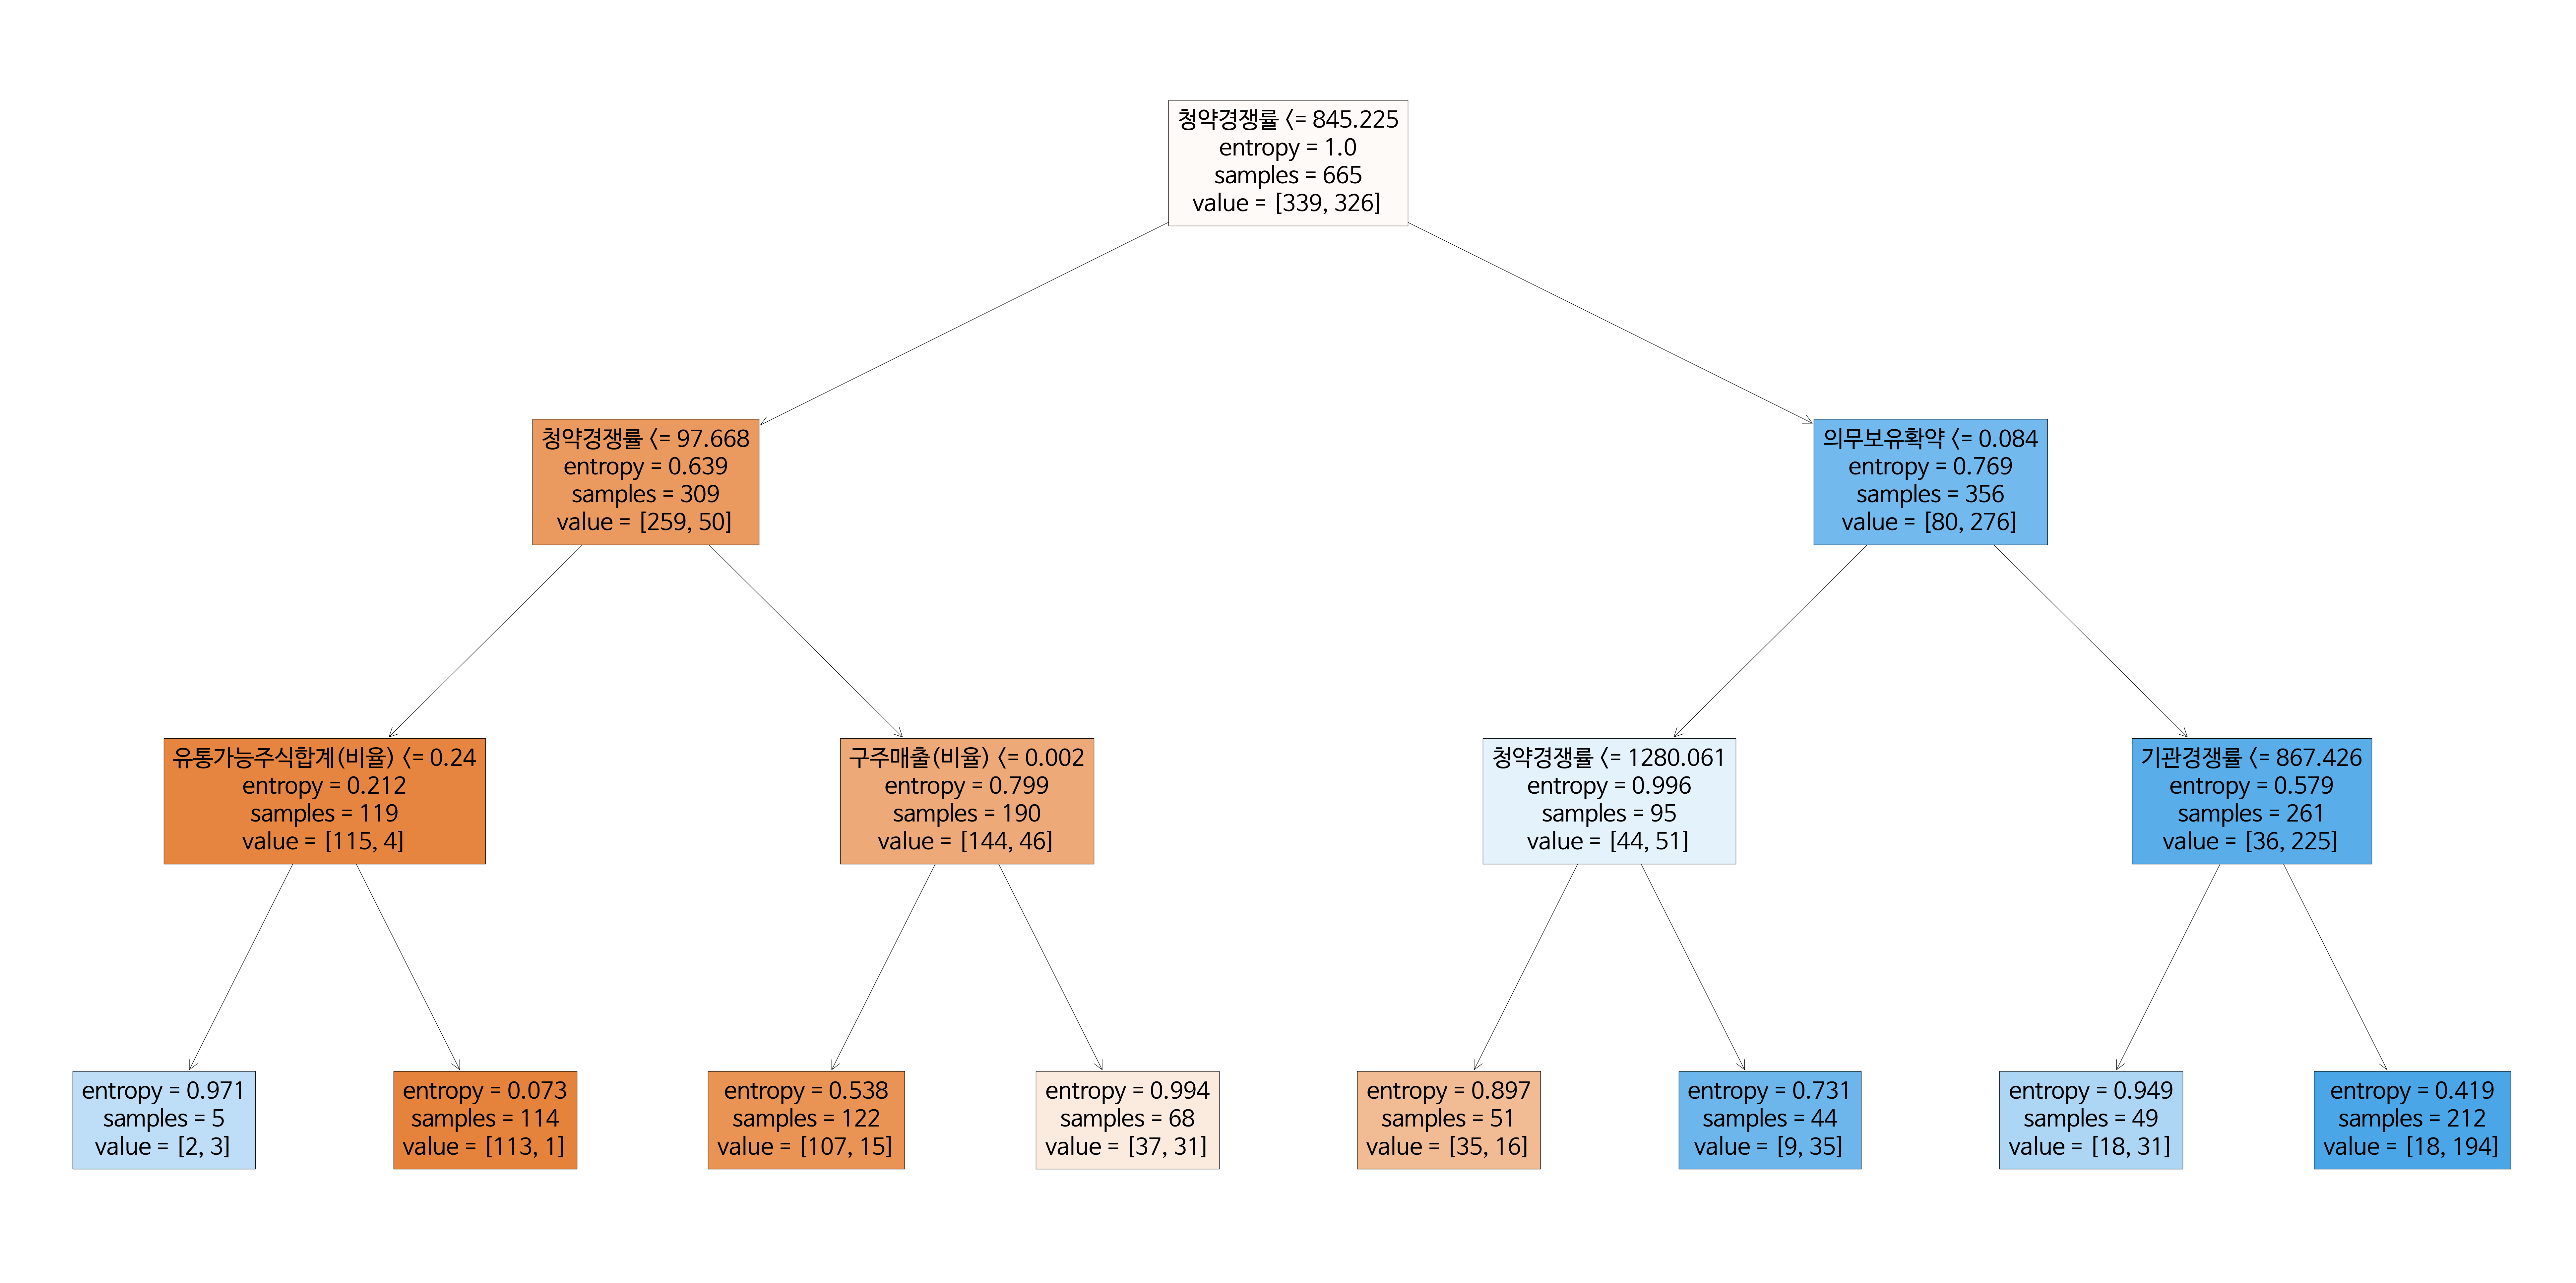

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Measure the performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(100,50))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()


## 추가로 해야할 작업들
- 데이터의 정규화나 표준화, 이상치 처리, 변수 변환(로그 변환 등)을 수행하여 종속변수와의 상관관계를 높이기
- 총 16가지 변수를 사용하였다. 
 - 이를 선택한 기준은 기존 교수님이 제공해준 변수에 6가지 변수를 더 추가하였다. 
 - 그렇기 때문에 기존 변수로 작업했을때 성능과 6가지를 다 사용했을 때의 성능
 - 그리고 6개 중에서 상관관계가 유의미한 변수만 사용했을 때의 성능 세가지를 비교할 필요가 있다.
 - 물론 조건은 같은 모델이여야 한다.
- 그리드 서치, 랜덤포레스트, 유전알고리즘 등을 활용하여 최적의 해를 찾아서 모델 고도화하기

> 결론적으로 
 - 데이터 품질 향상 미작업 + 교수님 제공 변수 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수에 추가로 6가지 변수 사용 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수에 추가로 6가지 변수중 유의미한 변수 사용 + 기본 하이퍼파라미터
 - 위의 것을 통해서 최적의 데이터 상태가 파악되면 하이퍼파라미터를 그리드서치, 랜덤서치등으로 고도화작업
 
 
- 마지막 결과 해석
 - 새로 추가한 변수가 미치는 영향
  - 상관관계
  - 실제 모델 결과
 - 모델별로 성능이 상이한데 더 좋은 성능의 모델이 있다면 왜 더 좋은지
 - 평가지표에서 recall precision, f1-score, accuracy가 있는데 여기에서는 무엇을 더 중요하게 봐야 하는지
 - 데이터 품질 개선을 위해서 어떤 기법을 왜 사용하였는가?

 


일단 제 의견은 다음과 같이 변수를 선택해서 최종 학습을 돌려보면 좋을 것 같아요
- 교수님이 주신 변수만 사용
- 상관계수를 통한 변수 선택
- p-value를 통한 변수 선택
- CART를 통한 변수선택
- C5.0을 통한 변수선택

그리고 우리가 생각했던 가설과 어떤 부분이 맞아떨여졌고 틀렸는지 확인하고 왜 그렇게 되었는지 분석하면 좋을것 같다는 의견입니다. 